### 애플의 주가 시계열 그래프 시각화 하기

In [20]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### appl_time_series.csv 파일을 읽어오기

In [21]:
apple = pd.read_csv('appl_time_series.csv')

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 컬럼 타입 확인하기

In [22]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 문자열을 Datetime 클래스로 변환하기

In [23]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### 변환한 Date 컬럼을 인덱스로 설정하기

In [24]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


위와 같이 Date를 인덱스로 설정하면 기존의 Date컬럼은 사라지고 인덱스로 적용된 것을 확인 할 수 있습니다.

### 날짜가 중복되었는지 확인해 봅시다.

In [25]:
# NO! All are unique
apple.index.is_unique

True

### 최근 날짜 순으로 DataFrame이 정렬되어 있습니다.
---
sort_index를 통해 인덱스 기준으로 오름차순 정렬합니다.

In [26]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### 월별 마지막 영업일을 구해 봅시다.
---

pandas에서는 날짜형태로 된 DataFrame을 다룰때 아주 유용한 함수들을 많이 제공해 주고 있습니다.  
아래 resample 함수의 문서를 참고해 봅시다.  

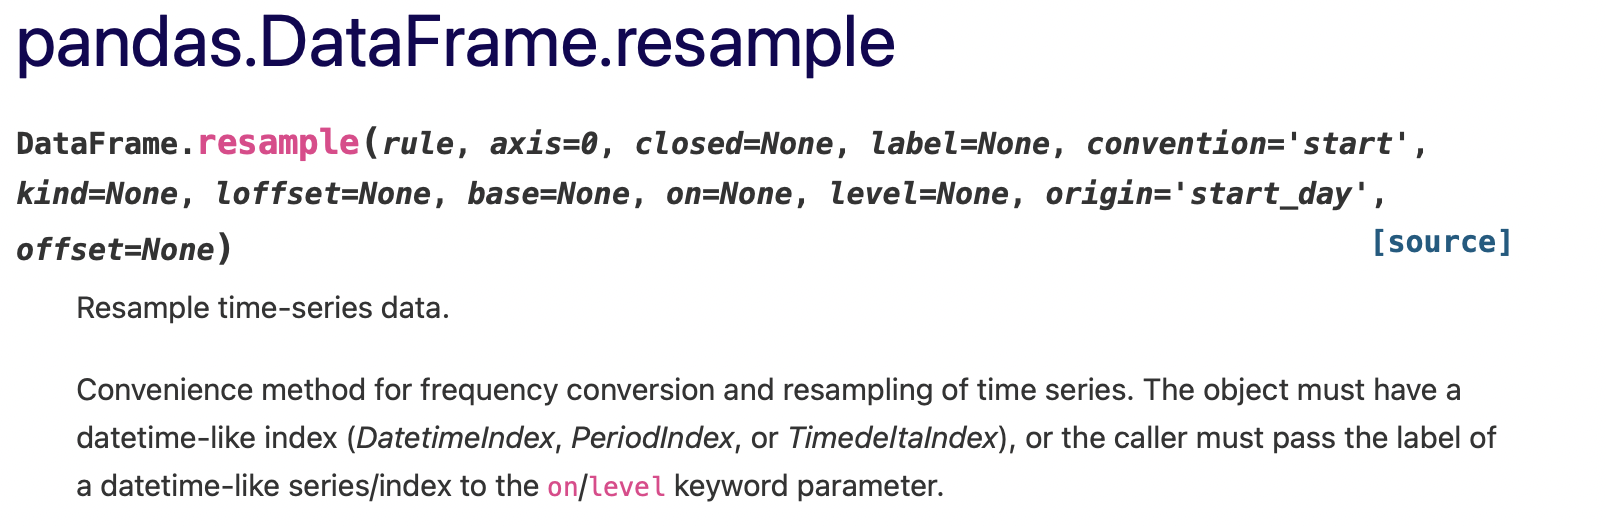



In [9]:
apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


### 시계열의 총 기간은 얼마나 되는지 계산해 봅시다.

In [10]:
(apple.index.max() - apple.index.min()).days

12261

### 월단위로 계산해 봅시다.

In [11]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

### 종가 'Adj Close' 컬럼으로 그래프를 그려 봅시다.

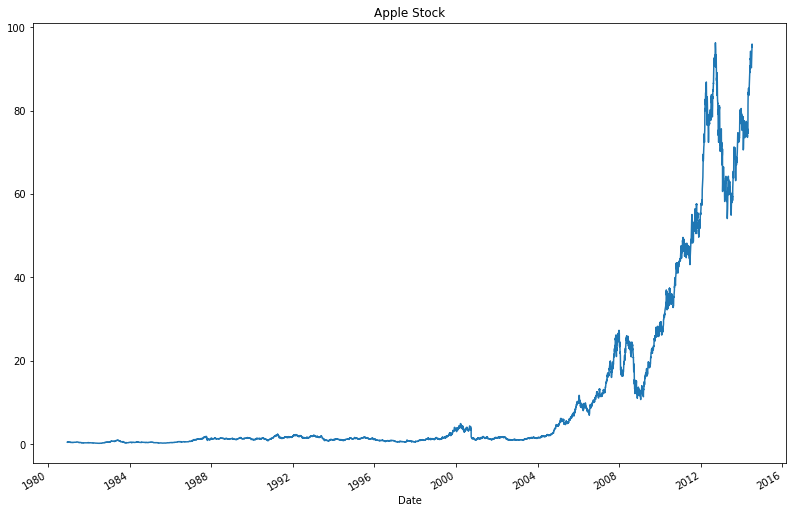

In [27]:
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

In [ ]:
# 실습 - 1
각 월별 최대값 최소값을 구해 봅시다. 


# 실습 - 2
각 월별 총 거래량을 구해봅시다.